# ВАРИАНТ 24

In [1]:
#Решение прямой задачи

In [2]:
a,b,c = input("Введите a: "), input("Введите b: "), input("Введите c: ")
n_a, n_b, n_c = int(a), int(b), int(c)
print(f"Значения a, b, c: {a}, {b}, {c}")

Введите a: 4
Введите b: 1
Введите c: 27
Значения a, b, c: 4, 1, 27


In [3]:
from scipy.optimize import linprog

In [4]:
price_A = 6 * n_b + 12
price_B = 5 * n_b + 22

price = [-price_A, -price_B, -n_c]

matrix = [[1, 3, n_a], [6, 5, 2]] 

stocks = [3000, 3320]  

x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)

m = linprog(c=price, A_ub=matrix, b_ub=stocks, bounds=[x1_bounds, x2_bounds, x3_bounds], method= "revised simplex")
m

     con: array([], dtype=float64)
     fun: -23972.727272727272
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([330.90909091,   0.        , 667.27272727])

Оптимальный план

In [5]:
m.x

array([330.90909091,   0.        , 667.27272727])

 Оптимальное значение целевой функции

In [6]:
-m.fun

23972.727272727272

In [7]:
#Решение двойственной задачи

In [8]:
price_A = 6 * n_b + 12
price_B = 5 * n_b + 22

price = [3000,3320]

matrix = [[-1,-6], [-3, -5], [-n_a, -2]]
stocks = [-price_A, -price_B, -n_c]

y1_bounds = (0, None)
y2_bounds = (0, None)

m = linprog(c=price, A_ub=matrix, b_ub=stocks, bounds=[y1_bounds, y2_bounds], method= "revised simplex")
m

     con: array([], dtype=float64)
     fun: 23972.727272727276
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.        , 0.40909091, 0.        ])
  status: 0
 success: True
       x: array([5.72727273, 2.04545455])

Оптимальный план

In [9]:
m.x

array([5.72727273, 2.04545455])

Оптимальное значение целевой функции

In [10]:
m.fun

23972.727272727276

Input:
 [[ 0.17  0.62  0.24]
 [ 0.3  -1.5  -0.8 ]
 [ 0.9   0.5   0.4 ]]
Optimal value: 0.39999999992121416
Optimal value2: 2.5000000004924114
| P | 0 | 0 | 1 |
| Q | 0 | 0 | 1 |

Игра, в которой спектр оптимальной стратегии состоит из одной точки (т.е. существует равновесие Нэша в чистых стратегиях)


<ipython-input-3-fbd423612d8c>:30: DeprecationWarning: scipy.transpose is deprecated and will be removed in SciPy 2.0.0, use numpy.transpose instead
  a_T = -scipy.transpose(a)


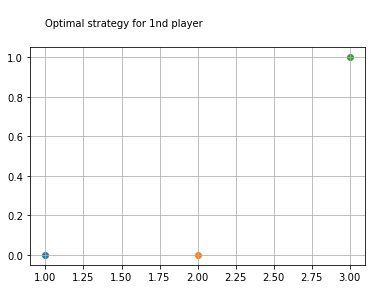

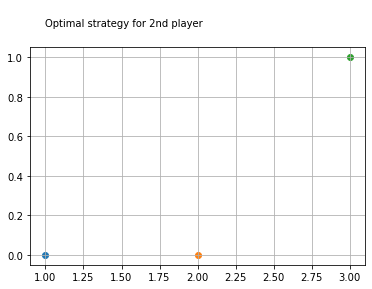

In [3]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np

def graf(a, b):
    fig = plt.figure()
    # Добавление на рисунок прямоугольной (по умолчанию) области рисования 
    for i in range(len(a)):
        scatter1 = plt.scatter(i+1, a[i])
    if b == 1:
        text1 = plt.text(1, 1.1, "\nOptimal strategy for 1nd player\n")
    if b == 2:
        text1 = plt.text(1, 1.1, "\nOptimal strategy for 2nd player\n")
    grid1 = plt.grid(True)   # линии вспомогательной сетки

plt.show()
    
def nash_equilibrium(a): 
    from fractions import Fraction 
    print("Input:\n", a) 
    c = np.array([1 for x in range(len(a[0]))]) 
    b = np.array([1 for x in range(len(a))]) 
    import scipy 
    from scipy.optimize import linprog 
    bounds = [(0, None)] 
    for x in range(len(a[0]) - 1): 
        bounds += [(0, None)] 
    a_T = -scipy.transpose(a) 
    res = linprog(c, A_ub=a_T, b_ub=-b, bounds=bounds, 
    options={"disp": False}) 
    p = [res.x[i]/(res.fun) for i in range(len(res.x))] 
    graf(p, 1)
    print ('Optimal value:', 1/(res.fun))
    print ('Optimal value2:', 1/(1/(res.fun)))
    print('| P', end=" ") 
    for i in range(len(p)): 
        print ('|', Fraction(p[i]).limit_denominator(1000), end=" "), 
    res = linprog(-c, A_ub=a, b_ub=b, bounds=bounds, 
    options={"disp": False}) 
    q = [res.x[i]/(-res.fun) for i in range(len(res.x))] 
    graf(q, 2)
    print ('|\n| Q', end=" ") 
    for i in range(len(q)): 
        print ('|', Fraction(q[i]).limit_denominator(1000), end=" "), 
    print ('|') 
    return 

if __name__ == "__main__": 
    import numpy as np 
    a = np.array([[ 0.17, 0.62, 0.24], 
    [0.3, -1.5, -0.8], 
    [0.9, 0.5, 0.4,]]) 
    nash_equilibrium(a)
    print ('\nИгра, в которой спектр оптимальной стратегии состоит из одной точки (т.е. существует равновесие Нэша в чистых стратегиях)') 
          
    